# Initialize

## Import Libraries

In [103]:
import datetime as dt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style

style.use('fivethirtyeight')

## Import Data

In [104]:
df_orig = pd.read_csv("../data/fpl_fbref_season_player_history.csv")
df_orig.head()
df_orig.columns

,Unnamed: 0,season_year_ending,season,division,team,player_name,nationality,position,age,games,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,0,2022,2021-2022,Premier League,Arsenal,Bukayo Saka,ENG,"FW,MF",19.0,38,...,0.0,6.0,0.0,0.0,18.0,566.0,790.4,977.8,1434.0,320.0
1,1,2022,2021-2022,Premier League,Arsenal,Gabriel dos Santos Magalhães,BRA,DF,23.0,35,...,0.0,6.0,1.0,0.0,16.0,682.0,746.8,131.6,470.0,134.7
2,2,2022,2021-2022,Premier League,Arsenal,Aaron Ramsdale,ENG,GK,23.0,34,...,0.0,1.0,0.0,90.0,14.0,641.0,690.2,1.0,0.0,69.0
3,3,2022,2021-2022,Premier League,Arsenal,Ben White,ENG,DF,23.0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2022,2021-2022,Premier League,Arsenal,Martin Ødegaard,NOR,MF,22.0,36,...,0.0,4.0,0.0,0.0,9.0,541.0,676.6,1073.2,639.0,238.2


Index(['Unnamed: 0', 'season_year_ending', 'season', 'division', 'team',
       'player_name', 'nationality', 'position', 'age', 'games',
       'games_starts', 'minutes_x', 'nbr_90s', 'goals', 'assists_x',
       'non_penalty_goals', 'penalties_successful', 'penalties_attempted',
       'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90',
       'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90',
       'xg', 'npxg', 'xa', 'npxg_xa', 'xg_per90', 'xa_per90', 'xg_xa_per90',
       'npxg_per90', 'npxg_xa_per90', 'Unnamed: 0_y', 'player_position',
       'first_name', 'second_name', 'element_code', 'start_cost', 'end_cost',
       'total_points', 'minutes_y', 'goals_scored', 'assists_y',
       'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved',
       'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus',
       'bps', 'influence', 'creativity', 'threat', 'ict_index'],
      dtype='object')

## Setup Columns

In [105]:
df_orig['start_cost'] = df_orig['start_cost'] / 10
df_orig['xg_per90_performance'] = df_orig['goals_per90'] - df_orig['xg_per90']
df_orig['value'] = df_orig['total_points'] / df_orig['start_cost']

cols_info = [
    'season_year_ending', 'player_name', 'player_position'
]
cols_response = ['total_points']
cols_numeric = [
    'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 
    'minutes_x', 'start_cost', 'clean_sheets', 'goals_conceded', 'goals', 'assists_x', 
    'goals_per90', 'assists_per90', 'xg_per90', 'xa_per90', 'npxg_per90', 'npxg_xa_per90',
    'value', 'xg_per90_performance'
]
df = df_orig[cols_info + cols_response + cols_numeric]
df.head(10)

,season_year_ending,player_name,player_position,total_points,bonus,bps,influence,creativity,threat,ict_index,...,goals,assists_x,goals_per90,assists_per90,xg_per90,xa_per90,npxg_per90,npxg_xa_per90,value,xg_per90_performance
0,2022,Bukayo Saka,MF,179.0,18.0,566.0,790.4,977.8,1434.0,320.0,...,11.0,7.0,0.33,0.21,0.29,0.21,0.25,0.46,27.538462,0.04
1,2022,Gabriel dos Santos Magalhães,DF,146.0,16.0,682.0,746.8,131.6,470.0,134.7,...,5.0,0.0,0.15,0.00,0.08,0.02,0.08,0.10,29.200000,0.07
2,2022,Aaron Ramsdale,GK,135.0,14.0,641.0,690.2,1.0,0.0,69.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,30.000000,0.00
3,2022,Ben White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,0.00,0.03,0.02,0.03,0.05,NaN,-0.03
4,2022,Martin Ødegaard,MF,131.0,9.0,541.0,676.6,1073.2,639.0,238.2,...,7.0,4.0,0.23,0.13,0.16,0.22,0.16,0.38,23.818182,0.07
5,2022,Granit Xhaka,MF,60.0,3.0,334.0,395.4,522.9,262.0,118.2,...,1.0,2.0,0.04,0.08,0.05,0.09,0.05,0.14,12.000000,-0.01
6,2022,Thomas Partey,MF,71.0,4.0,345.0,359.6,275.5,394.0,103.0,...,2.0,1.0,0.09,0.04,0.11,0.06,0.11,0.17,14.200000,-0.02
7,2022,Kieran Tierney,DF,106.0,11.0,454.0,365.2,335.9,198.0,90.1,...,1.0,3.0,0.05,0.14,0.03,0.09,0.03,0.12,21.200000,0.02
8,2022,Emile Smith Rowe,MF,125.0,9.0,435.0,555.8,453.3,576.0,158.4,...,10.0,2.0,0.47,0.09,0.27,0.10,0.27,0.37,22.727273,0.20
9,2022,Martinelli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,0.29,0.29,0.35,0.16,0.31,0.47,NaN,-0.06


# General Analysis (2021-22)

## Filter for Last Season (2021-22)

In [106]:
df22 = df[cols_info + cols_response + cols_numeric][(df['season_year_ending'] == 2022)] # & (df['total_points'].notna())]
df22.shape
df22.head()
print(df22.describe())

(690, 24)

,season_year_ending,player_name,player_position,total_points,bonus,bps,influence,creativity,threat,ict_index,...,goals,assists_x,goals_per90,assists_per90,xg_per90,xa_per90,npxg_per90,npxg_xa_per90,value,xg_per90_performance
0,2022,Bukayo Saka,MF,179.0,18.0,566.0,790.4,977.8,1434.0,320.0,...,11.0,7.0,0.33,0.21,0.29,0.21,0.25,0.46,27.538462,0.04
1,2022,Gabriel dos Santos Magalhães,DF,146.0,16.0,682.0,746.8,131.6,470.0,134.7,...,5.0,0.0,0.15,0.00,0.08,0.02,0.08,0.10,29.200000,0.07
2,2022,Aaron Ramsdale,GK,135.0,14.0,641.0,690.2,1.0,0.0,69.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,30.000000,0.00
3,2022,Ben White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,0.00,0.03,0.02,0.03,0.05,NaN,-0.03
4,2022,Martin Ødegaard,MF,131.0,9.0,541.0,676.6,1073.2,639.0,238.2,...,7.0,4.0,0.23,0.13,0.16,0.22,0.16,0.38,23.818182,0.07


       season_year_ending  total_points       bonus         bps    influence  \
count               690.0    341.000000  341.000000  341.000000   341.000000   
mean               2022.0     60.310850    4.859238  259.152493   312.057478   
std                   0.0     51.514505    6.118257  212.460544   263.175432   
min                2022.0      0.000000    0.000000    0.000000     0.000000   
25%                2022.0     14.000000    0.000000   64.000000    79.400000   
50%                2022.0     55.000000    3.000000  227.000000   259.400000   
75%                2022.0     92.000000    8.000000  403.000000   481.000000   
max                2022.0    265.000000   33.000000  864.000000  1241.000000   

        creativity       threat   ict_index    minutes_x  start_cost  ...  \
count   341.000000   341.000000  341.000000   560.000000  341.000000  ...   
mean    209.660997   248.906158   77.010557  1388.094643    5.370968  ...   
std     251.934994   320.224678   73.090472  108

## Correlation Matrix

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap for numerical Variables')

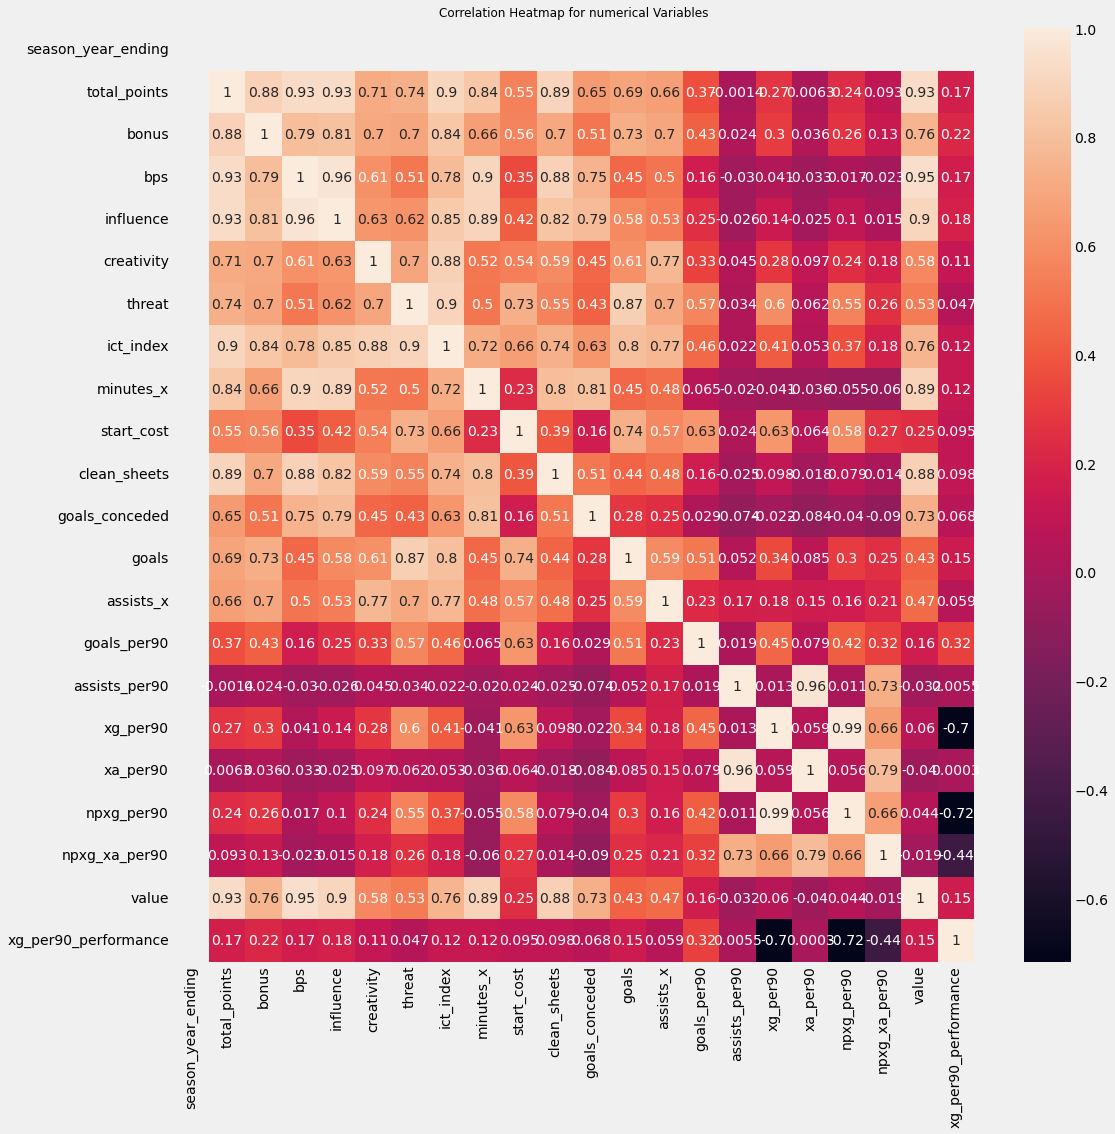

In [107]:
plt.figure(figsize=(16, 16))
sns.heatmap(df22.corr(), annot=True)
plt.title('Correlation Heatmap for numerical Variables', fontdict={'fontsize':12}, pad=12)

## Pair Plot

In [108]:
#sns.pairplot(df22[cols_response + cols_numeric])
#plt.show()

## Points vs BPS Scatterplot

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='bps'>

Text(179.3, 566.3, 'Bukayo Saka')

Text(169.3, 597.3, 'Mason Mount')

Text(150.3, 422.3, 'Wilfried Zaha')

Text(181.3, 637.3, 'James Maddison')

Text(176.3, 782.3, 'Alisson Ramses Becker')

Text(183.3, 803.3, 'Virgil van Dijk')

Text(208.3, 864.3, 'Trent Alexander-Arnold')

Text(265.3, 756.3, 'Mohamed Salah')

Text(186.3, 770.3, 'Andrew Robertson')

Text(155.3, 701.3, 'Ederson Santana de Moraes')

Text(201.3, 829.3, 'João Cancelo')

Text(160.3, 714.3, 'Aymeric Laporte')

Text(196.3, 732.3, 'Kevin De Bruyne')

Text(163.3, 468.3, 'Raheem Sterling')

Text(159.3, 769.3, 'James Ward-Prowse')

Text(158.3, 703.3, 'Hugo Lloris')

Text(192.3, 684.3, 'Harry Kane')

Text(258.3, 819.3, 'Son Heung-min')

Text(206.3, 586.3, 'Jarrod Bowen')

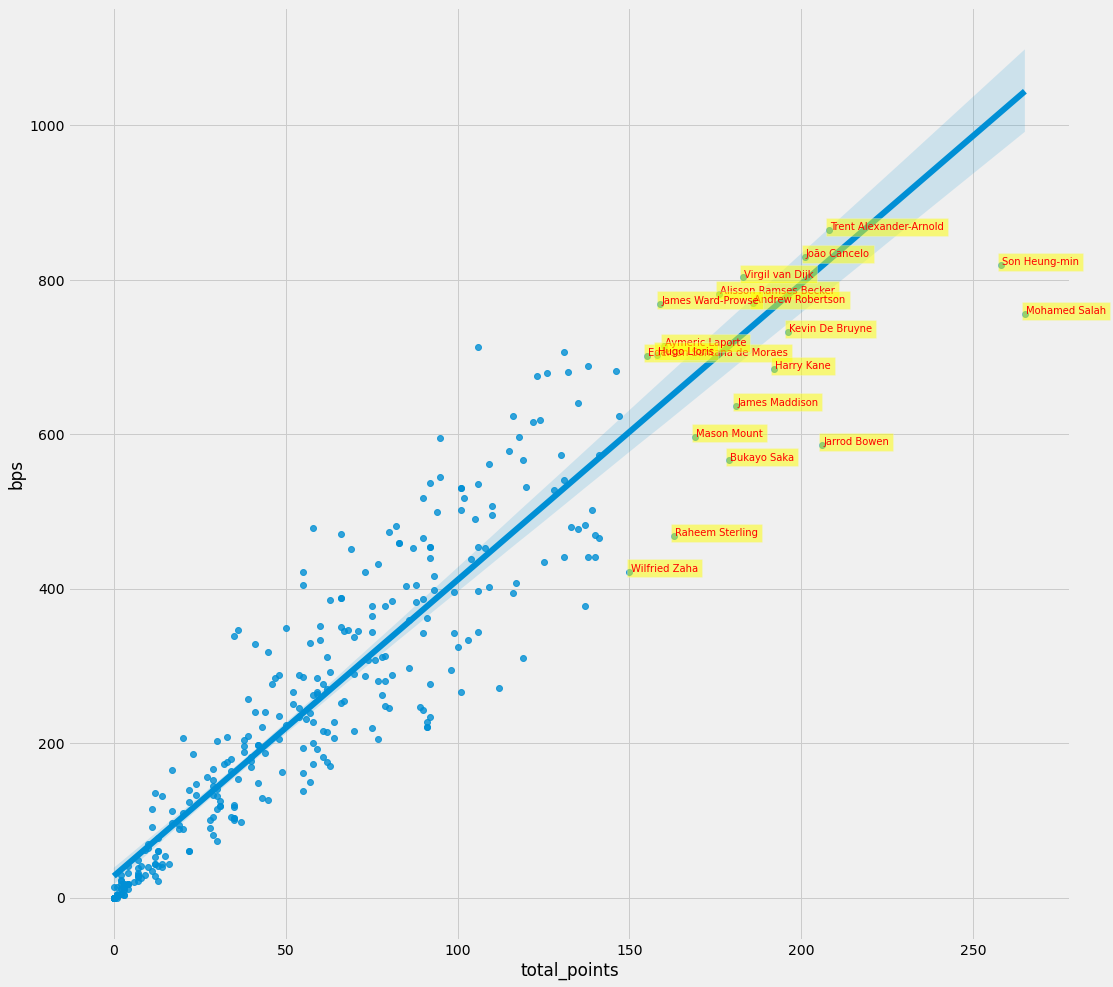

In [109]:
plt.figure(figsize=(16, 16))
sns.regplot(x='total_points', y='bps', data=df22)
for i in range(len(df22)):
    if (df22.total_points[i] >= 150):
        plt.text(x=df22.total_points[i]+0.3, y=df22.bps[i]+0.3, s=df22.player_name[i],
                fontdict=dict(color='red',size=10), bbox=dict(facecolor='yellow',alpha=0.5))

## Points vs Cost Scatterplot

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='start_cost'>

Text(179.1, 6.6, 'Bukayo Saka')

Text(169.1, 7.6, 'Mason Mount')

Text(150.1, 7.1, 'Wilfried Zaha')

Text(181.1, 7.1, 'James Maddison')

Text(176.1, 6.1, 'Alisson Ramses Becker')

Text(183.1, 6.6, 'Virgil van Dijk')

Text(208.1, 7.6, 'Trent Alexander-Arnold')

Text(265.1, 12.6, 'Mohamed Salah')

Text(186.1, 7.1, 'Andrew Robertson')

Text(155.1, 6.1, 'Ederson Santana de Moraes')

Text(201.1, 6.1, 'João Cancelo')

Text(160.1, 5.6, 'Aymeric Laporte')

Text(196.1, 12.1, 'Kevin De Bruyne')

Text(163.1, 11.1, 'Raheem Sterling')

Text(159.1, 6.6, 'James Ward-Prowse')

Text(158.1, 5.6, 'Hugo Lloris')

Text(192.1, 12.6, 'Harry Kane')

Text(258.1, 10.1, 'Son Heung-min')

Text(206.1, 6.6, 'Jarrod Bowen')

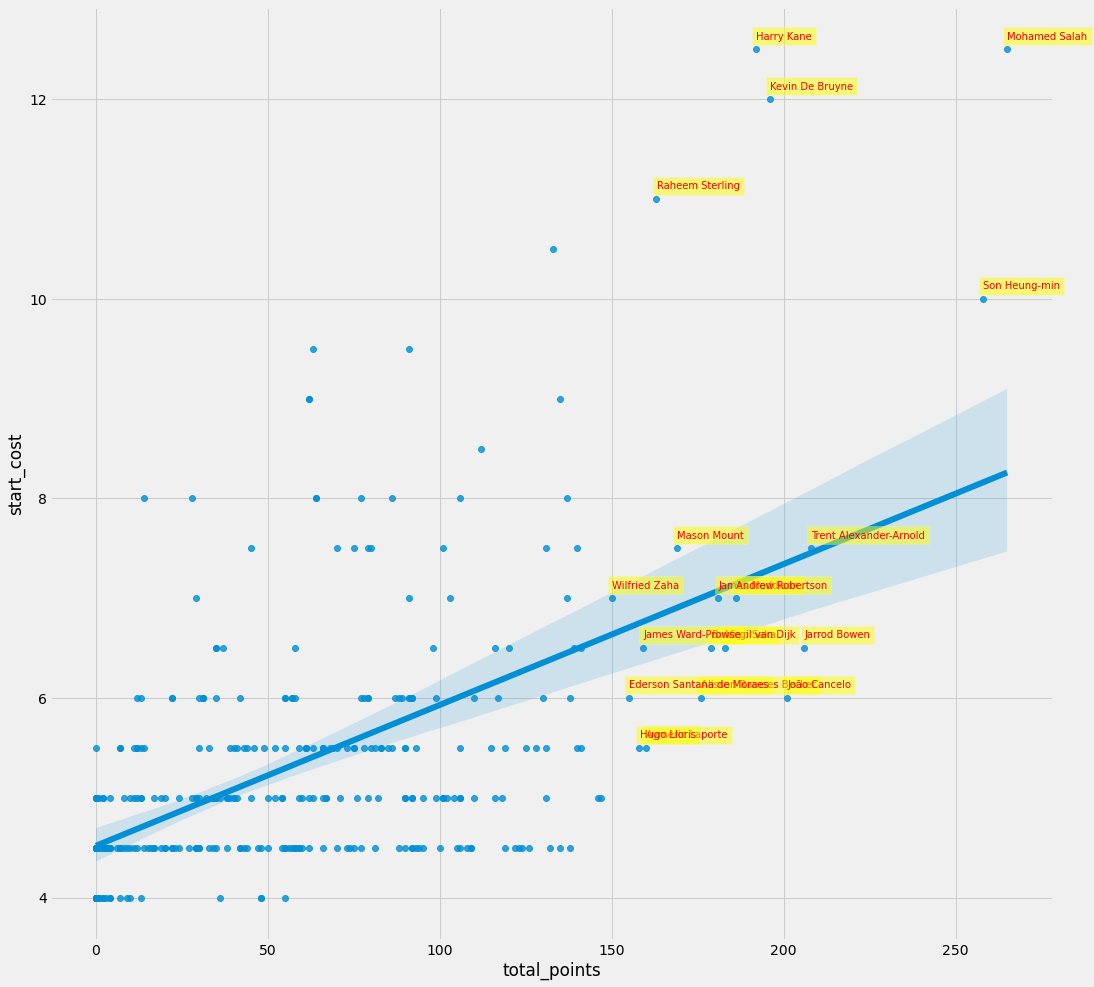

In [110]:
pred = 'start_cost'
plt.figure(figsize=(16, 16))
sns.regplot(x='total_points', y=pred, data=df22)
for i in range(len(df22)):
    if (df22.total_points[i] >= 150):
        plt.text(x=df22.total_points[i]+0.1, y=df22[pred][i]+0.1, s=df22.player_name[i],
                fontdict=dict(color='red',size=10), bbox=dict(facecolor='yellow',alpha=0.5))


## Filter Top 40 Performers by 'Value'

In [111]:
df22_val_cols = ['player_name', 'player_position', 'total_points', 'start_cost', 'value', 'minutes_x', 'bps', 'ict_index', 'clean_sheets', 'goals_conceded', 'goals', 'assists_x', 'goals_per90', 'xg_per90', 'xg_per90_performance']
df22_val = df22[df22_val_cols].sort_values(by='value', ascending=False).head(40)
df22_val.sort_values(by=['player_position', 'total_points'], ascending=[True, False])

,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
389,Trent Alexander-Arnold,DF,208.0,7.5,27.733333,2853.0,864.0,283.2,18.0,22.0,2.0,12.0,0.06,0.08,-0.02
423,João Cancelo,DF,201.0,6.0,33.500000,3227.0,829.0,243.6,19.0,25.0,1.0,7.0,0.03,0.12,-0.09
394,Andrew Robertson,DF,186.0,7.0,26.571429,2537.0,770.0,198.3,17.0,20.0,3.0,10.0,0.11,0.07,0.04
388,Virgil van Dijk,DF,183.0,6.5,28.153846,3060.0,803.0,133.1,21.0,21.0,3.0,1.0,0.09,0.07,0.02
426,Aymeric Laporte,DF,160.0,5.5,29.090909,2828.0,714.0,120.7,18.0,24.0,4.0,0.0,0.13,0.14,-0.01
41,Matty Cash,DF,147.0,5.0,29.400000,3377.0,623.0,172.1,13.0,50.0,4.0,3.0,0.11,0.07,0.04
1,Gabriel dos Santos Magalhães,DF,146.0,5.0,29.200000,3063.0,682.0,134.7,13.0,38.0,5.0,0.0,0.15,0.08,0.07
198,Reece James,DF,141.0,5.5,25.636364,1864.0,573.0,178.0,7.0,22.0,5.0,9.0,0.24,0.12,0.12
657,Conor Coady,DF,138.0,4.5,30.666667,3361.0,688.0,103.2,11.0,43.0,4.0,0.0,0.11,0.05,0.06
593,Eric Dier,DF,132.0,4.5,29.333333,3071.0,680.0,104.0,16.0,30.0,0.0,0.0,0.00,0.03,-0.03


## Best Performers by Position (2021-22)

In [112]:
df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='total_points', ascending=False).head(10)
df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='total_points', ascending=False).head(10)
df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='total_points', ascending=False).head(10)
df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='total_points', ascending=False).head(10)

/tmp/ipykernel_14607/3446834406.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
387,Alisson Ramses Becker,GK,176.0,6.0,29.333333,3240.0,782.0,73.1,20.0,24.0,0.0,1.0,0.0,0.0,0.0
590,Hugo Lloris,GK,158.0,5.5,28.727273,3420.0,703.0,76.9,16.0,40.0,0.0,0.0,0.0,0.0,0.0
422,Ederson Santana de Moraes,GK,155.0,6.0,25.833333,3330.0,701.0,56.1,20.0,26.0,0.0,0.0,0.0,0.0,0.0
2,Aaron Ramsdale,GK,135.0,4.5,30.000000,3060.0,641.0,69.0,12.0,39.0,0.0,0.0,0.0,0.0,0.0
355,Kasper Schmeichel,GK,131.0,5.0,26.200000,3330.0,706.0,109.1,7.0,58.0,0.0,0.0,0.0,0.0,0.0
191,Edouard Mendy,GK,130.0,6.0,21.666667,3060.0,573.0,58.2,14.0,31.0,0.0,0.0,0.0,0.0,0.0
156,Robert Sánchez,GK,126.0,4.5,28.000000,3329.0,679.0,84.0,11.0,42.0,0.0,0.0,0.0,0.0,0.0
227,Vicente Guaita,GK,119.0,4.5,26.444444,2655.0,567.0,61.4,11.0,33.0,0.0,0.0,0.0,0.0,0.0
252,Jordan Pickford,GK,116.0,5.0,23.200000,3150.0,624.0,90.5,7.0,58.0,0.0,0.0,0.0,0.0,0.0
323,Illan Meslier,GK,106.0,5.0,21.200000,3384.0,713.0,108.9,5.0,79.0,0.0,0.0,0.0,0.0,0.0


/tmp/ipykernel_14607/3446834406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
389,Trent Alexander-Arnold,DF,208.0,7.5,27.733333,2853.0,864.0,283.2,18.0,22.0,2.0,12.0,0.06,0.08,-0.02
423,João Cancelo,DF,201.0,6.0,33.500000,3227.0,829.0,243.6,19.0,25.0,1.0,7.0,0.03,0.12,-0.09
394,Andrew Robertson,DF,186.0,7.0,26.571429,2537.0,770.0,198.3,17.0,20.0,3.0,10.0,0.11,0.07,0.04
388,Virgil van Dijk,DF,183.0,6.5,28.153846,3060.0,803.0,133.1,21.0,21.0,3.0,1.0,0.09,0.07,0.02
426,Aymeric Laporte,DF,160.0,5.5,29.090909,2828.0,714.0,120.7,18.0,24.0,4.0,0.0,0.13,0.14,-0.01
41,Matty Cash,DF,147.0,5.0,29.400000,3377.0,623.0,172.1,13.0,50.0,4.0,3.0,0.11,0.07,0.04
1,Gabriel dos Santos Magalhães,DF,146.0,5.0,29.200000,3063.0,682.0,134.7,13.0,38.0,5.0,0.0,0.15,0.08,0.07
198,Reece James,DF,141.0,5.5,25.636364,1864.0,573.0,178.0,7.0,22.0,5.0,9.0,0.24,0.12,0.12
657,Conor Coady,DF,138.0,4.5,30.666667,3361.0,688.0,103.2,11.0,43.0,4.0,0.0,0.11,0.05,0.06
593,Eric Dier,DF,132.0,4.5,29.333333,3071.0,680.0,104.0,16.0,30.0,0.0,0.0,0.00,0.03,-0.03


/tmp/ipykernel_14607/3446834406.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
392,Mohamed Salah,MF,265.0,12.5,21.200000,2762.0,756.0,434.8,17.0,22.0,23.0,13.0,0.75,0.71,0.04
594,Son Heung-min,MF,258.0,10.0,25.800000,3006.0,819.0,355.4,18.0,30.0,23.0,7.0,0.69,0.49,0.20
629,Jarrod Bowen,MF,206.0,6.5,31.692308,2983.0,586.0,267.4,8.0,46.0,12.0,10.0,0.36,0.34,0.02
428,Kevin De Bruyne,MF,196.0,12.0,16.333333,2201.0,732.0,311.0,13.0,22.0,15.0,8.0,0.61,0.26,0.35
358,James Maddison,MF,181.0,7.0,25.857143,2459.0,637.0,230.2,5.0,41.0,12.0,8.0,0.44,0.30,0.14
0,Bukayo Saka,MF,179.0,6.5,27.538462,2978.0,566.0,320.0,13.0,39.0,11.0,7.0,0.33,0.29,0.04
194,Mason Mount,MF,169.0,7.5,22.533333,2363.0,597.0,276.3,11.0,25.0,11.0,10.0,0.42,0.34,0.08
430,Raheem Sterling,MF,163.0,11.0,14.818182,2128.0,468.0,253.4,13.0,17.0,13.0,5.0,0.55,0.61,-0.06
561,James Ward-Prowse,MF,159.0,6.5,24.461538,3215.0,769.0,255.5,7.0,65.0,10.0,5.0,0.28,0.15,0.13
226,Wilfried Zaha,MF,150.0,7.0,21.428571,2760.0,422.0,243.8,11.0,34.0,14.0,1.0,0.46,0.31,0.15


/tmp/ipykernel_14607/3446834406.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
591,Harry Kane,FW,192.0,12.5,15.360000,3232.0,684.0,350.4,14.0,40.0,17.0,9.0,0.47,0.56,-0.09
630,Michail Antonio,FW,140.0,7.5,18.666667,2971.0,441.0,252.7,7.0,43.0,10.0,8.0,0.30,0.34,-0.04
124,Ivan Toney,FW,139.0,6.5,21.384615,2909.0,502.0,260.7,8.0,47.0,12.0,5.0,0.37,0.37,0.00
364,Jamie Vardy,FW,133.0,10.5,12.666667,1806.0,480.0,159.6,4.0,27.0,15.0,2.0,0.75,0.47,0.28
45,Ollie Watkins,FW,131.0,7.5,17.466667,2952.0,441.0,242.9,10.0,48.0,11.0,2.0,0.34,0.37,-0.03
122,Bryan Mbeumo,FW,119.0,5.5,21.636364,2905.0,310.0,193.7,9.0,47.0,4.0,7.0,0.12,0.30,-0.18
199,Kai Havertz,FW,112.0,8.5,13.176471,1809.0,271.0,171.9,10.0,18.0,8.0,3.0,0.40,0.48,-0.08
50,Danny Ings,FW,106.0,8.0,13.250000,1898.0,344.0,140.3,10.0,26.0,7.0,6.0,0.33,0.35,-0.02
568,Che Adams,FW,103.0,7.0,14.714286,2039.0,333.0,156.8,5.0,40.0,7.0,3.0,0.31,0.31,0.00
663,Raúl Jiménez,FW,101.0,7.5,13.466667,2631.0,266.0,171.2,11.0,32.0,6.0,4.0,0.21,0.23,-0.02


## Best Value by Position (2021-22)

In [113]:
df22_gk = df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='value', ascending=False).head(10)
df22_df = df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='value', ascending=False).head(10)
df22_mf = df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='value', ascending=False).head(10)
df22_fw = df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='value', ascending=False).head(10)
df22_gk.sort_values(by='total_points', ascending=False)
df22_df.sort_values(by='total_points', ascending=False)
df22_mf.sort_values(by='total_points', ascending=False)
df22_fw.sort_values(by='total_points', ascending=False)

/tmp/ipykernel_14607/2171168699.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_gk = df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='value', ascending=False).head(10)
/tmp/ipykernel_14607/2171168699.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_df = df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='value', ascending=False).head(10)
/tmp/ipykernel_14607/2171168699.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_mf = df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='value', ascending=False).head(10)
/tmp/ipykernel_14607/2171168699.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_fw = df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='value', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
387,Alisson Ramses Becker,GK,176.0,6.0,29.333333,3240.0,782.0,73.1,20.0,24.0,0.0,1.0,0.0,0.0,0.0
590,Hugo Lloris,GK,158.0,5.5,28.727273,3420.0,703.0,76.9,16.0,40.0,0.0,0.0,0.0,0.0,0.0
422,Ederson Santana de Moraes,GK,155.0,6.0,25.833333,3330.0,701.0,56.1,20.0,26.0,0.0,0.0,0.0,0.0,0.0
2,Aaron Ramsdale,GK,135.0,4.5,30.000000,3060.0,641.0,69.0,12.0,39.0,0.0,0.0,0.0,0.0,0.0
355,Kasper Schmeichel,GK,131.0,5.0,26.200000,3330.0,706.0,109.1,7.0,58.0,0.0,0.0,0.0,0.0,0.0
191,Edouard Mendy,GK,130.0,6.0,21.666667,3060.0,573.0,58.2,14.0,31.0,0.0,0.0,0.0,0.0,0.0
156,Robert Sánchez,GK,126.0,4.5,28.000000,3329.0,679.0,84.0,11.0,42.0,0.0,0.0,0.0,0.0,0.0
227,Vicente Guaita,GK,119.0,4.5,26.444444,2655.0,567.0,61.4,11.0,33.0,0.0,0.0,0.0,0.0,0.0
252,Jordan Pickford,GK,116.0,5.0,23.200000,3150.0,624.0,90.5,7.0,58.0,0.0,0.0,0.0,0.0,0.0
323,Illan Meslier,GK,106.0,5.0,21.200000,3384.0,713.0,108.9,5.0,79.0,0.0,0.0,0.0,0.0,0.0


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
389,Trent Alexander-Arnold,DF,208.0,7.5,27.733333,2853.0,864.0,283.2,18.0,22.0,2.0,12.0,0.06,0.08,-0.02
423,João Cancelo,DF,201.0,6.0,33.500000,3227.0,829.0,243.6,19.0,25.0,1.0,7.0,0.03,0.12,-0.09
388,Virgil van Dijk,DF,183.0,6.5,28.153846,3060.0,803.0,133.1,21.0,21.0,3.0,1.0,0.09,0.07,0.02
426,Aymeric Laporte,DF,160.0,5.5,29.090909,2828.0,714.0,120.7,18.0,24.0,4.0,0.0,0.13,0.14,-0.01
41,Matty Cash,DF,147.0,5.0,29.400000,3377.0,623.0,172.1,13.0,50.0,4.0,3.0,0.11,0.07,0.04
1,Gabriel dos Santos Magalhães,DF,146.0,5.0,29.200000,3063.0,682.0,134.7,13.0,38.0,5.0,0.0,0.15,0.08,0.07
657,Conor Coady,DF,138.0,4.5,30.666667,3361.0,688.0,103.2,11.0,43.0,4.0,0.0,0.11,0.05,0.06
593,Eric Dier,DF,132.0,4.5,29.333333,3071.0,680.0,104.0,16.0,30.0,0.0,0.0,0.00,0.03,-0.03
225,Joachim Andersen,DF,124.0,4.5,27.555556,2916.0,619.0,100.7,12.0,37.0,0.0,3.0,0.00,0.02,-0.02
222,Marc Guéhi,DF,123.0,4.5,27.333333,3222.0,676.0,111.1,11.0,43.0,2.0,1.0,0.06,0.05,0.01


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
594,Son Heung-min,MF,258.0,10.0,25.800000,3006.0,819.0,355.4,18.0,30.0,23.0,7.0,0.69,0.49,0.20
629,Jarrod Bowen,MF,206.0,6.5,31.692308,2983.0,586.0,267.4,8.0,46.0,12.0,10.0,0.36,0.34,0.02
358,James Maddison,MF,181.0,7.0,25.857143,2459.0,637.0,230.2,5.0,41.0,12.0,8.0,0.44,0.30,0.14
0,Bukayo Saka,MF,179.0,6.5,27.538462,2978.0,566.0,320.0,13.0,39.0,11.0,7.0,0.33,0.29,0.04
561,James Ward-Prowse,MF,159.0,6.5,24.461538,3215.0,769.0,255.5,7.0,65.0,10.0,5.0,0.28,0.15,0.13
224,Conor Gallagher,MF,140.0,5.5,25.454545,2845.0,469.0,197.9,11.0,38.0,8.0,3.0,0.25,0.18,0.07
634,Saïd Benrahma,MF,138.0,6.0,23.000000,2168.0,441.0,177.6,9.0,27.0,8.0,6.0,0.33,0.21,0.12
4,Martin Ødegaard,MF,131.0,5.5,23.818182,2785.0,541.0,238.2,11.0,39.0,7.0,4.0,0.23,0.16,0.07
8,Emile Smith Rowe,MF,125.0,5.5,22.727273,1921.0,435.0,158.4,8.0,28.0,10.0,2.0,0.47,0.27,0.20
48,Jacob Ramsey,MF,109.0,4.5,24.222222,2467.0,402.0,130.7,12.0,35.0,6.0,1.0,0.22,0.14,0.08


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
591,Harry Kane,FW,192.0,12.5,15.360000,3232.0,684.0,350.4,14.0,40.0,17.0,9.0,0.47,0.56,-0.09
630,Michail Antonio,FW,140.0,7.5,18.666667,2971.0,441.0,252.7,7.0,43.0,10.0,8.0,0.30,0.34,-0.04
124,Ivan Toney,FW,139.0,6.5,21.384615,2909.0,502.0,260.7,8.0,47.0,12.0,5.0,0.37,0.37,0.00
45,Ollie Watkins,FW,131.0,7.5,17.466667,2952.0,441.0,242.9,10.0,48.0,11.0,2.0,0.34,0.37,-0.03
122,Bryan Mbeumo,FW,119.0,5.5,21.636364,2905.0,310.0,193.7,9.0,47.0,4.0,7.0,0.12,0.30,-0.18
568,Che Adams,FW,103.0,7.0,14.714286,2039.0,333.0,156.8,5.0,40.0,7.0,3.0,0.31,0.31,0.00
663,Raúl Jiménez,FW,101.0,7.5,13.466667,2631.0,266.0,171.2,11.0,32.0,6.0,4.0,0.21,0.23,-0.02
161,Neal Maupay,FW,98.0,6.5,15.076923,2276.0,295.0,143.5,7.0,31.0,8.0,2.0,0.32,0.30,0.02
569,Armando Broja,FW,92.0,5.0,18.400000,1975.0,234.0,115.6,5.0,37.0,6.0,0.0,0.27,0.32,-0.05
170,Danny Welbeck,FW,89.0,6.0,14.833333,1478.0,247.0,117.8,5.0,16.0,6.0,2.0,0.37,0.37,0.00


## Xg Underperformers

In [114]:
df22[(df.ict_index.notna()) & (df.minutes_x > 400)][['player_name','player_position','minutes_x','goals','assists_x','goals_per90','xg_per90','xg_per90_performance']].sort_values(by='xg_per90_performance').head(20)

/tmp/ipykernel_14607/1261972529.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[(df.ict_index.notna()) & (df.minutes_x > 400)][['player_name','player_position','minutes_x','goals','assists_x','goals_per90','xg_per90','xg_per90_performance']].sort_values(by='xg_per90_performance').head(20)


,player_name,player_position,minutes_x,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
340,Patrick Bamford,FW,559.0,2.0,2.0,0.32,0.63,-0.31
580,Moussa Djenepo,MF,457.0,0.0,0.0,0.00,0.30,-0.30
205,Timo Werner,FW,1283.0,4.0,1.0,0.28,0.53,-0.25
19,Nicolas Pépé,MF,696.0,1.0,2.0,0.13,0.38,-0.25
122,Bryan Mbeumo,FW,2905.0,4.0,7.0,0.12,0.30,-0.18
574,Adam Armstrong,FW,1413.0,2.0,2.0,0.13,0.27,-0.14
269,Salomón Rondón,FW,790.0,1.0,1.0,0.11,0.25,-0.14
130,Mathias Jensen,MF,1601.0,0.0,1.0,0.00,0.14,-0.14
341,Joe Gelhardt,FW,746.0,2.0,2.0,0.24,0.38,-0.14
264,Dominic Calvert-Lewin,FW,1283.0,5.0,2.0,0.35,0.48,-0.13


# Defender Analysis (2021-22)

In [115]:
df22_def = df22[df22.player_position=='DF']
df22_def.shape

(129, 24)

## Scatterplots of main defensive predictors

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='goals_conceded'>

Text(146.1, 38.1, 'Gabriel dos Santos Magalhães')

Text(106.1, 21.1, 'Kieran Tierney')

Text(147.1, 50.1, 'Matty Cash')

Text(118.1, 49.1, 'Tyrone Mings')

Text(101.1, 47.1, 'Matt Targett')

Text(122.1, 56.1, 'Pontus Jansson')

Text(108.1, 41.1, 'Rico Henry')

Text(128.1, 22.1, 'Marcos Alonso')

Text(141.1, 22.1, 'Reece James')

Text(123.1, 43.1, 'Marc Guéhi')

Text(109.1, 43.1, 'Tyrick Mitchell')

Text(124.1, 37.1, 'Joachim Andersen')

Text(102.1, 54.1, 'Michael Keane')

Text(183.1, 21.1, 'Virgil van Dijk')

Text(208.1, 22.1, 'Trent Alexander-Arnold')

Text(186.1, 20.1, 'Andrew Robertson')

Text(201.1, 25.1, 'João Cancelo')

Text(160.1, 24.1, 'Aymeric Laporte')

Text(101.1, 47.1, 'Matt Targett')

Text(132.1, 30.1, 'Eric Dier')

Text(105.1, 30.1, 'Ben Davies')

Text(104.1, 25.1, 'Sergio Reguilón')

Text(115.1, 38.1, 'Aaron Cresswell')

Text(138.1, 43.1, 'Conor Coady')

Text(106.1, 25.1, 'Max Kilman')

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='clean_sheets'>

Text(146.1, 13.1, 'Gabriel dos Santos Magalhães')

Text(106.1, 11.1, 'Kieran Tierney')

Text(147.1, 13.1, 'Matty Cash')

Text(118.1, 11.1, 'Tyrone Mings')

Text(101.1, 9.1, 'Matt Targett')

Text(122.1, 8.1, 'Pontus Jansson')

Text(108.1, 9.1, 'Rico Henry')

Text(128.1, 9.1, 'Marcos Alonso')

Text(141.1, 7.1, 'Reece James')

Text(123.1, 11.1, 'Marc Guéhi')

Text(109.1, 10.1, 'Tyrick Mitchell')

Text(124.1, 12.1, 'Joachim Andersen')

Text(102.1, 8.1, 'Michael Keane')

Text(183.1, 21.1, 'Virgil van Dijk')

Text(208.1, 18.1, 'Trent Alexander-Arnold')

Text(186.1, 17.1, 'Andrew Robertson')

Text(201.1, 19.1, 'João Cancelo')

Text(160.1, 18.1, 'Aymeric Laporte')

Text(101.1, 9.1, 'Matt Targett')

Text(132.1, 16.1, 'Eric Dier')

Text(105.1, 12.1, 'Ben Davies')

Text(104.1, 9.1, 'Sergio Reguilón')

Text(115.1, 7.1, 'Aaron Cresswell')

Text(138.1, 11.1, 'Conor Coady')

Text(106.1, 10.1, 'Max Kilman')

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='bonus'>

Text(146.1, 16.1, 'Gabriel dos Santos Magalhães')

Text(106.1, 11.1, 'Kieran Tierney')

Text(147.1, 11.1, 'Matty Cash')

Text(118.1, 12.1, 'Tyrone Mings')

Text(101.1, 7.1, 'Matt Targett')

Text(122.1, 13.1, 'Pontus Jansson')

Text(108.1, 4.1, 'Rico Henry')

Text(128.1, 14.1, 'Marcos Alonso')

Text(141.1, 26.1, 'Reece James')

Text(123.1, 8.1, 'Marc Guéhi')

Text(109.1, 6.1, 'Tyrick Mitchell')

Text(124.1, 14.1, 'Joachim Andersen')

Text(102.1, 11.1, 'Michael Keane')

Text(183.1, 13.1, 'Virgil van Dijk')

Text(208.1, 32.1, 'Trent Alexander-Arnold')

Text(186.1, 23.1, 'Andrew Robertson')

Text(201.1, 27.1, 'João Cancelo')

Text(160.1, 8.1, 'Aymeric Laporte')

Text(101.1, 7.1, 'Matt Targett')

Text(132.1, 7.1, 'Eric Dier')

Text(105.1, 3.1, 'Ben Davies')

Text(104.1, 9.1, 'Sergio Reguilón')

Text(115.1, 17.1, 'Aaron Cresswell')

Text(138.1, 10.1, 'Conor Coady')

Text(106.1, 5.1, 'Max Kilman')

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='goals'>

Text(146.1, 5.1, 'Gabriel dos Santos Magalhães')

Text(106.1, 1.1, 'Kieran Tierney')

Text(147.1, 4.1, 'Matty Cash')

Text(118.1, 1.1, 'Tyrone Mings')

Text(101.1, 1.1, 'Matt Targett')

Text(122.1, 3.1, 'Pontus Jansson')

Text(108.1, 3.1, 'Rico Henry')

Text(128.1, 4.1, 'Marcos Alonso')

Text(141.1, 5.1, 'Reece James')

Text(123.1, 2.1, 'Marc Guéhi')

Text(109.1, 0.1, 'Tyrick Mitchell')

Text(124.1, 0.1, 'Joachim Andersen')

Text(102.1, 3.1, 'Michael Keane')

Text(183.1, 3.1, 'Virgil van Dijk')

Text(208.1, 2.1, 'Trent Alexander-Arnold')

Text(186.1, 3.1, 'Andrew Robertson')

Text(201.1, 1.1, 'João Cancelo')

Text(160.1, 4.1, 'Aymeric Laporte')

Text(101.1, 0.1, 'Matt Targett')

Text(132.1, 0.1, 'Eric Dier')

Text(105.1, 1.1, 'Ben Davies')

Text(104.1, 2.1, 'Sergio Reguilón')

Text(115.1, 2.1, 'Aaron Cresswell')

Text(138.1, 4.1, 'Conor Coady')

Text(106.1, 1.1, 'Max Kilman')

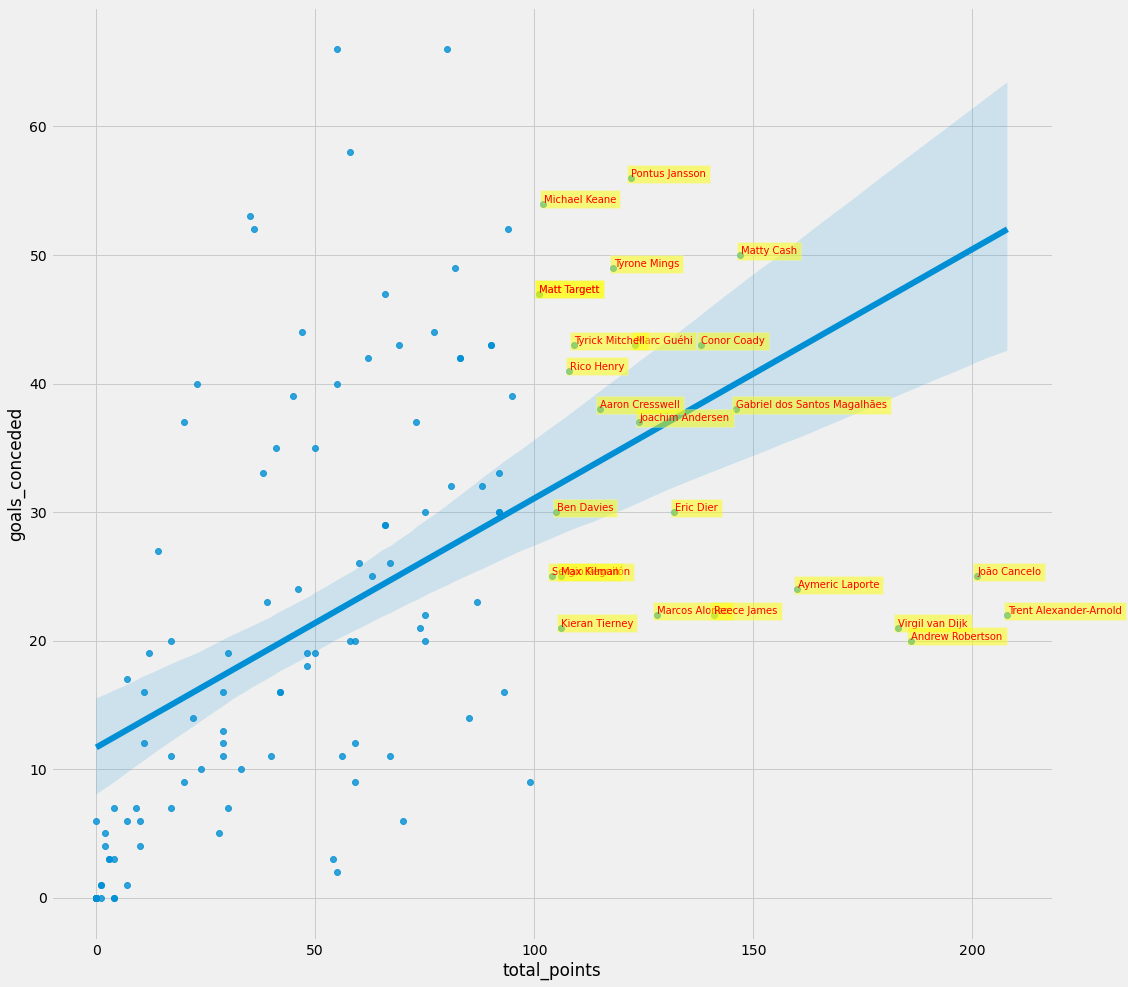

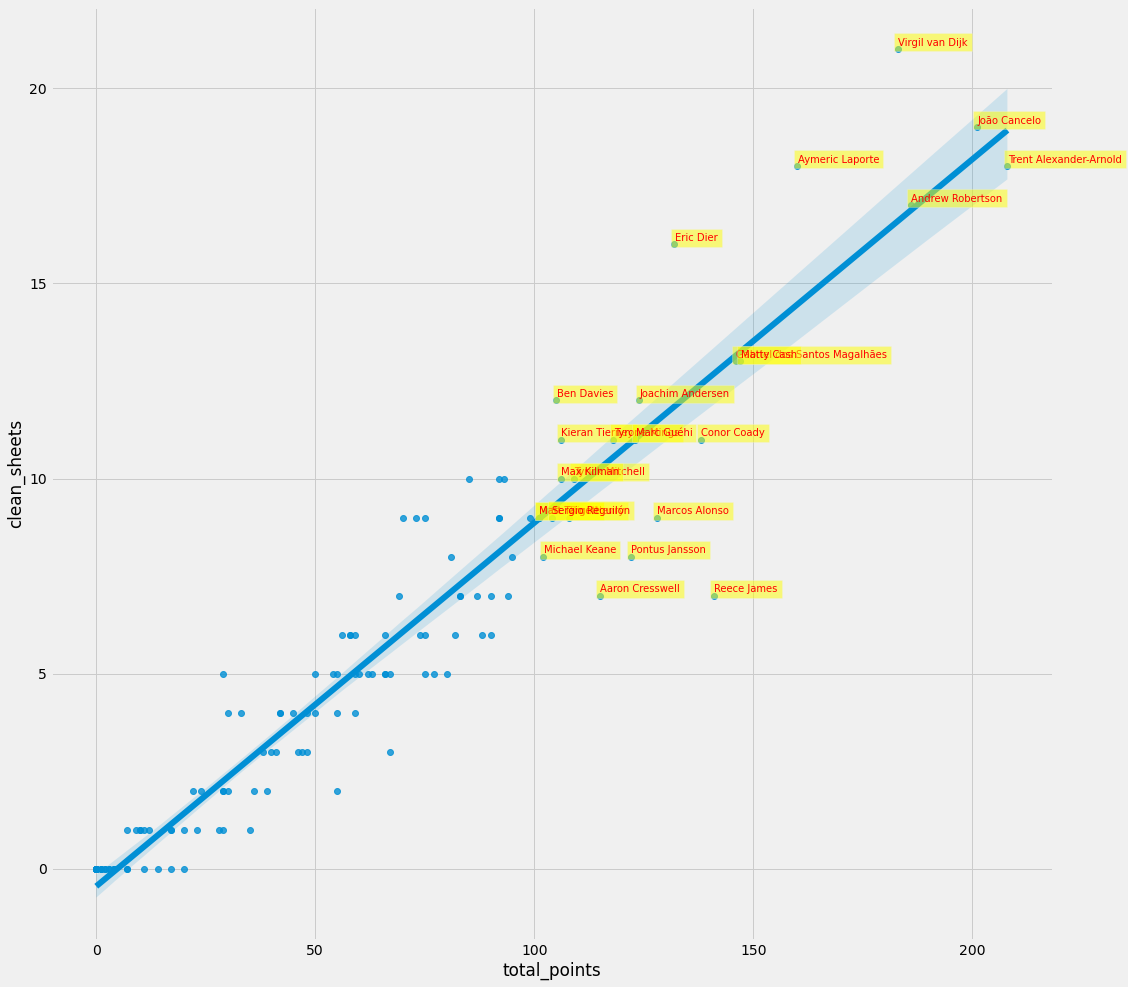

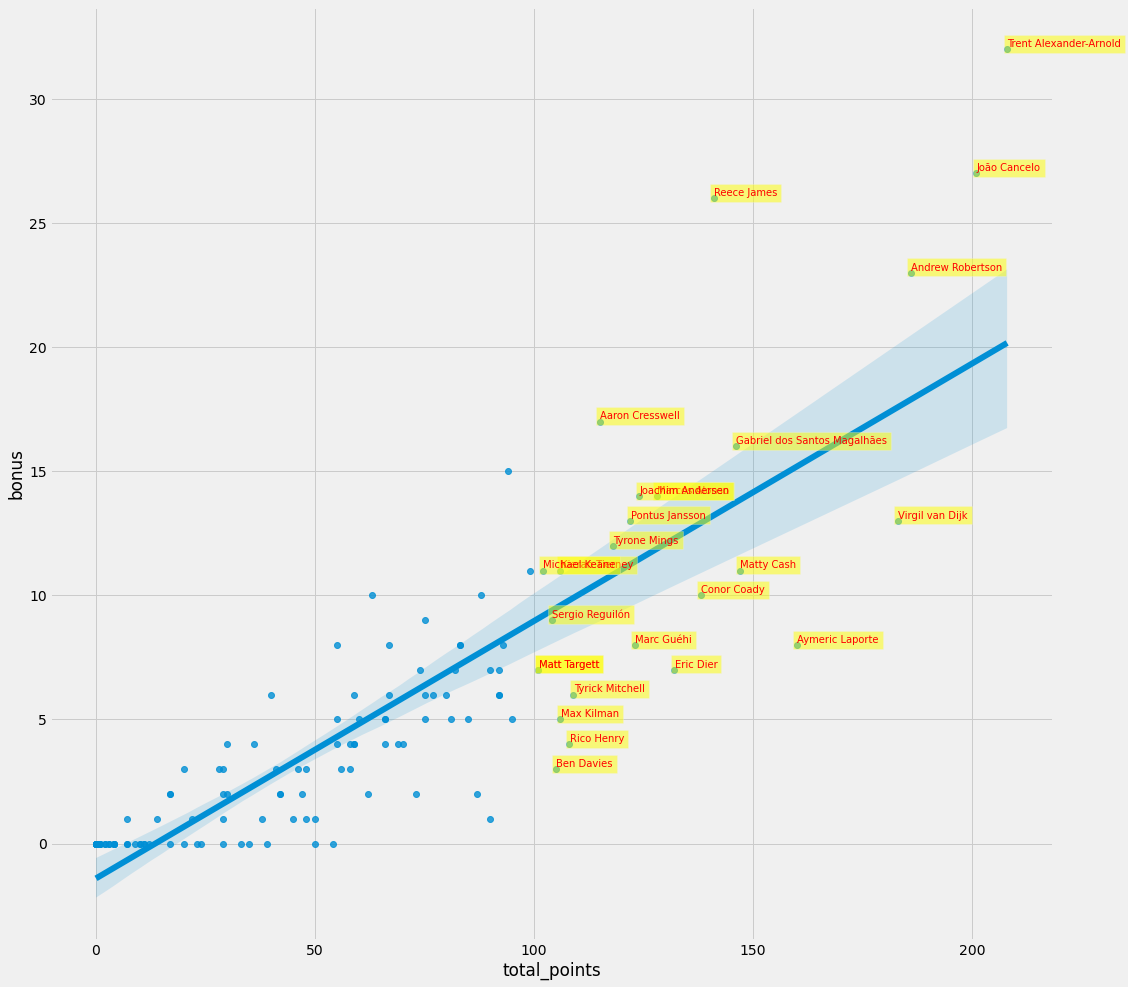

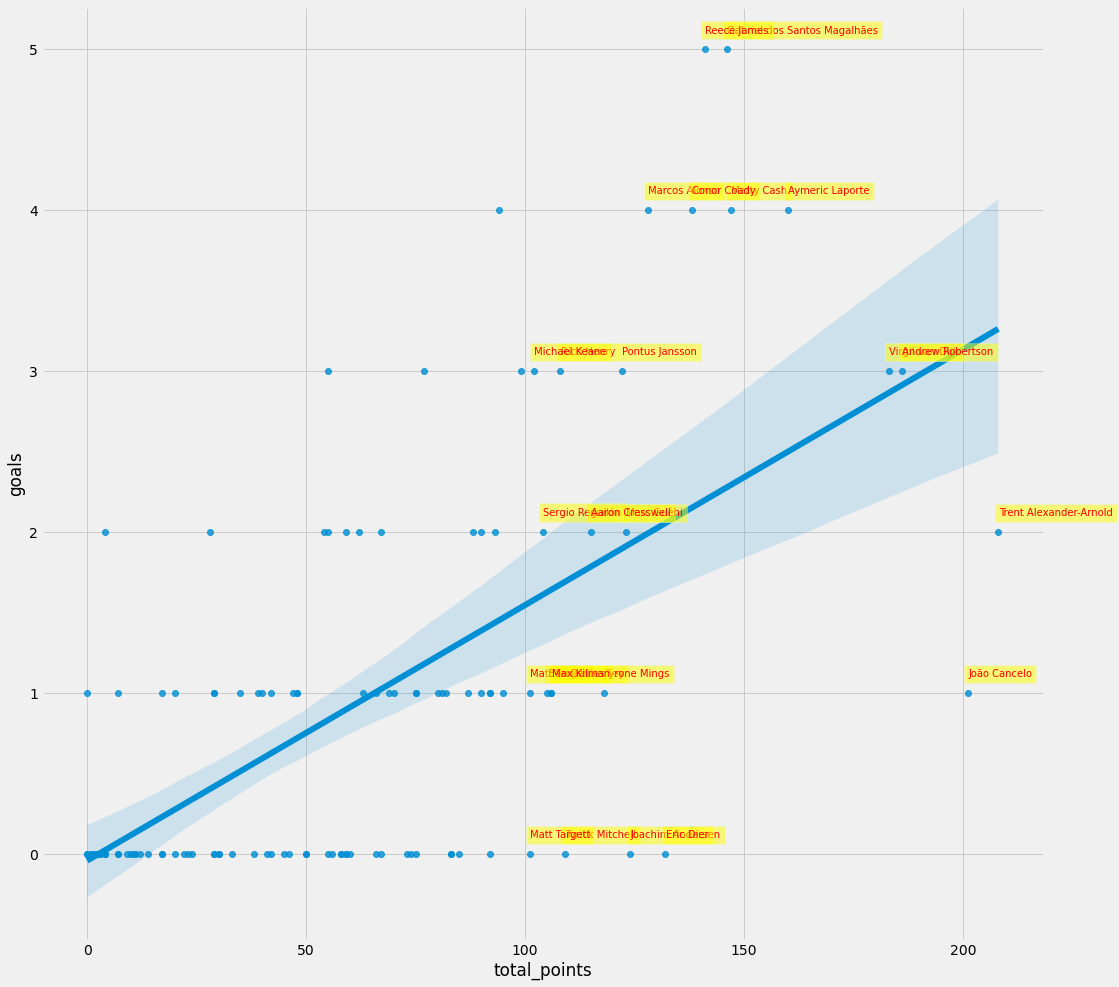

In [116]:
def_vars = ['goals_conceded', 'clean_sheets', 'bonus', 'goals']
for dv in def_vars:
    plt.figure(figsize=(16, 16))
    sns.regplot(x='total_points', y=dv, data=df22_def)
    for i in df22_def.index:
        if (df22_def.total_points[i] >= 100):
            plt.text(x=df22_def.total_points[i]+0.1, y=df22_def[dv][i]+0.1, s=df22_def.player_name[i],
                    fontdict=dict(color='red',size=10), bbox=dict(facecolor='yellow',alpha=0.5))

## Xg Underperformers (defenders)

In [117]:
df22_def[(df22_def.ict_index.notna()) & (df22_def.minutes_x > 400) & (df22_def.xg_per90 > 0.03)][['player_name','player_position','minutes_x','goals','assists_x','goals_per90','xg_per90','xg_per90_performance']].sort_values(by='xg_per90_performance').head(20)

,player_name,player_position,minutes_x,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
423,João Cancelo,DF,3227.0,1.0,7.0,0.03,0.12,-0.09
513,Federico Fernández,DF,523.0,0.0,0.0,0.00,0.07,-0.07
509,Ciaran Clark,DF,1014.0,0.0,1.0,0.00,0.07,-0.07
374,James Justin,DF,998.0,0.0,0.0,0.00,0.06,-0.06
563,Mohammed Salisu,DF,2972.0,0.0,0.0,0.00,0.06,-0.06
598,Sergio Reguilón,DF,1916.0,2.0,3.0,0.09,0.14,-0.05
608,Matt Doherty,DF,875.0,2.0,4.0,0.21,0.26,-0.05
261,Ben Godfrey,DF,2029.0,0.0,0.0,0.00,0.05,-0.05
606,Japhet Tanganga,DF,735.0,0.0,0.0,0.00,0.05,-0.05
168,Tariq Lamptey,DF,1561.0,0.0,2.0,0.00,0.05,-0.05


In [118]:
df22_def[df22_def.minutes_x > 400][['player_name','player_position','minutes_x','goals','assists_x','goals_per90','xg_per90','xg_per90_performance', 'xa_per90', 'npxg_xa_per90']].sort_values(by='npxg_xa_per90', ascending=False).head(20)

,player_name,player_position,minutes_x,goals,assists_x,goals_per90,xg_per90,xg_per90_performance,xa_per90,npxg_xa_per90
608,Matt Doherty,DF,875.0,2.0,4.0,0.21,0.26,-0.05,0.18,0.44
389,Trent Alexander-Arnold,DF,2853.0,2.0,12.0,0.06,0.08,-0.02,0.35,0.44
198,Reece James,DF,1864.0,5.0,9.0,0.24,0.12,0.12,0.28,0.40
211,Ben Chilwell,DF,542.0,3.0,1.0,0.50,0.19,0.31,0.15,0.34
598,Sergio Reguilón,DF,1916.0,2.0,3.0,0.09,0.14,-0.05,0.19,0.33
196,Marcos Alonso,DF,2167.0,4.0,4.0,0.17,0.14,0.03,0.19,0.33
605,Ryan Sessegnon,DF,1047.0,0.0,2.0,0.00,0.03,-0.03,0.25,0.28
423,João Cancelo,DF,3227.0,1.0,7.0,0.03,0.12,-0.09,0.14,0.26
394,Andrew Robertson,DF,2537.0,3.0,10.0,0.11,0.07,0.04,0.18,0.25
437,Oleksandr Zinchenko,DF,1047.0,0.0,4.0,0.00,0.04,-0.04,0.18,0.21
